# Studying Algorithms

## Some References

### Orders of Magnitude (Time)


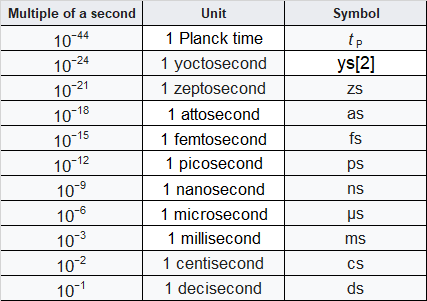




### Orders of common functions 

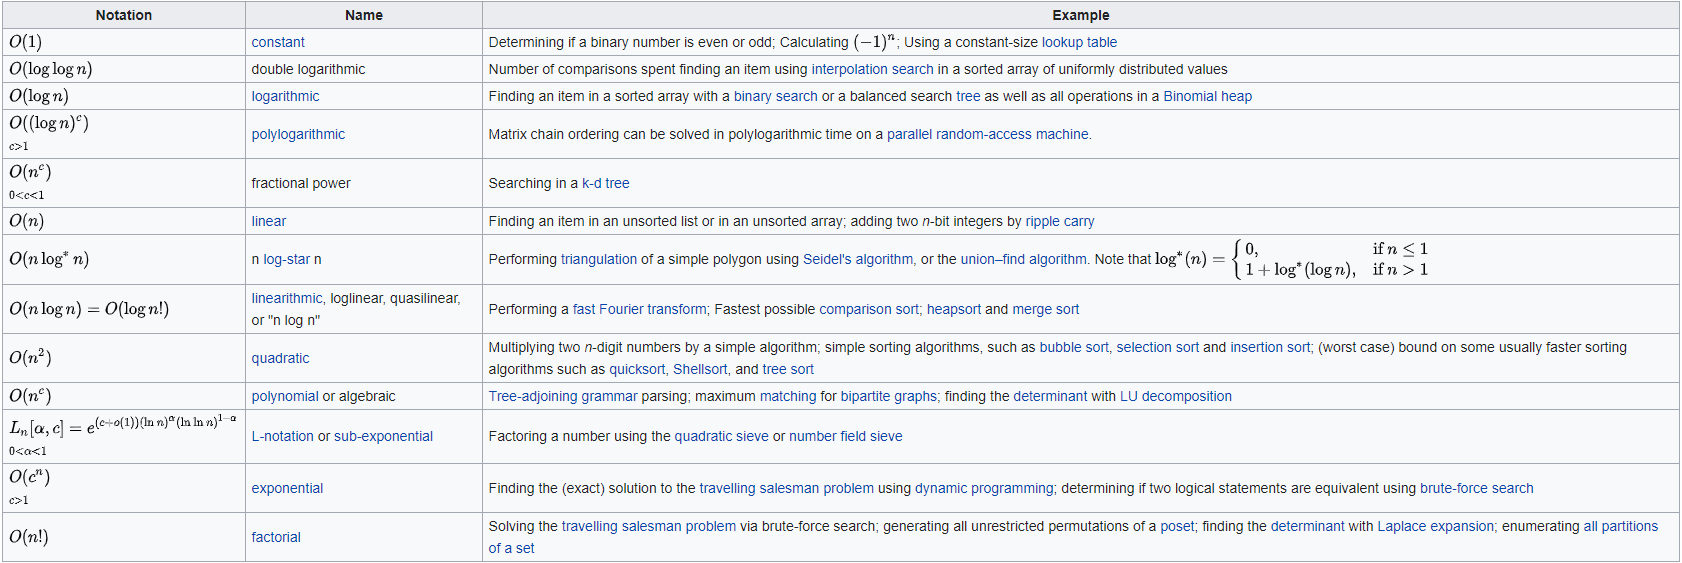

In [14]:
import numpy as np
from numpy.random import randint

# A function to simulate one million dice throws.

def one_million_dice():
    return randint(low=1, high=7, size=100000)


In [15]:
# %%timeit must be ran in it's own individual cell

%%timeit
throws = one_million_dice()
mean = np.mean(throws)

880 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%time throws = one_million_dice()

Wall time: 966 µs


In [17]:
%timeit throws = one_million_dice()

762 µs ± 7.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Big O Notation

This takes away the variations in computing speed and measures the performance and complexity (space and time) of an algorithm.

How quickly runtime will grow relative to the input?

No based on the timing functions used above (e.g. %%timeit)


## O(1) Constant

Regardless of the list size, the constant will always return 1

In [20]:
var = [1,2,3,4,5]

def constant(l):
    print(l[0])
    
constant(var)

1


## O(n) Linear

The number of operations will scale linearly with n = 100 values = 100 times

In [21]:
var = [1,2,3,4,5]

def linear(l):
    for val in l:
        print(val)
        
linear(var)

1
2
3
4
5


## O(n^2) Quadratic 

For a list of n items - we have to perform n actions = n X n

Dangerous, because it can take a lot of time!

In [24]:
var = [1,2,3]

def quadratic(l):
    for item_1 in l:
        for item_2 in l:
            print(item_1, item_2)
            
quadratic(var)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


## Comparing time for methods on lists

In [55]:
def first(x):
    l = []
    for n in range(x):
        l = l + [n]
        
def second(x):
    l = []
    for n in range(x):
        l.append(n)
        
def third(x):
    l = [n for n in range(x)]
    
def fourth(x):
    l = range(x)
    

first_time = %timeit -o first(100)
second_time = %timeit -o second(100)
third_time = %timeit -o third(100)
fourth_time = %timeit -o fourth(100)



32.2 µs ± 977 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.76 µs ± 170 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.06 µs ± 242 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
220 ns ± 7.38 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [53]:
import timeit

print(timeit.Timer(str(first(100))).timeit())
print(timeit.Timer(str(second(100))).timeit())
print(timeit.Timer(str(third(100))).timeit())
print(timeit.Timer(str(fourth(100))).timeit())

0.011939899999561021
0.006495800000266172
0.006761800001186202
0.006326699998680851


[0.01265869999951974, 0.006870299999718554, 0.00735270000041055, 0.006569299999682698]


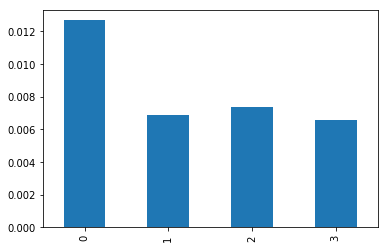

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

first = timeit.Timer(str(first(100))).timeit()
second = timeit.Timer(str(second(100))).timeit()
third = timeit.Timer(str(third(100))).timeit()
fourth = timeit.Timer(str(fourth(100))).timeit()

data = [first, second, third, fourth]
print(data)

df = pd.DataFrame(data,columns=["Timing"])
df['Timing'].plot(kind='bar')

## Efficiencies for List Operations


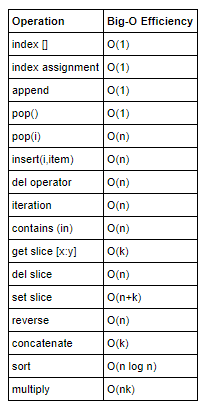

## Efficiencies for Dictionaries (Hash Tables)

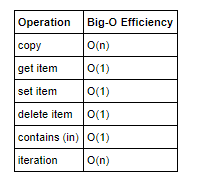

## Array Sequences = List, Tuple, String

## Anagram

Python sorted() Function
The sorted() function returns a sorted list of the specified iterable object. You can specify ascending or descending order. Strings are sorted alphabetically, and numbers are sorted numerically. Note: You cannot sort a list that contains BOTH string values AND numeric values.

In [58]:
def anagram(string1, string2):
    string1 = string1.replace(' ','').lower()
    string2 = string2.replace(' ','').lower()
    return sorted(string1)  == sorted(string2)

s1 = 'Dog'
s2 = 'God'

anagram(s1, s2)

True

## Array Pair Sum

Given an array of numbers, output all the unique pairs that sum to a specified number.

--------------------

A set is a collection which is unordered and unindexed. In Python, sets are written with curly brackets

thisset = {"apple", "banana", "cherry"}

--------------------

In Python 'not in' membership operator evaluates to true if it does not finds a variable in the specified sequence and false otherwise. 

--------------------

The min() function returns the item with the lowest value, or the item with the lowest value in an iterable.

In [74]:
def pair_sum(arr, k):
    
    if len(arr) <2:
        return False
    
    seen = set()
    output = set()
    
    for num in arr:
        target = k - num
        
        if target not in seen:
            seen.add(num)
            
        else:
            output.add((min(num,target), max(num,target)))

    return print('\n'.join(map(str,list(output))))


pair_sum([0,1,3,2,5,6,7,8,9,2,2,2,2,2,2], 9)
    

(2, 7)
(1, 8)
(0, 9)
(3, 6)


## Find the Missing Element

2 Arrays, find the missing element in the 2nd Array...

------------------

The sort() method sorts the elements of a given list in a specific ascending or descending order. The syntax of the sort() method is: list.sort(key=..., reverse=...) Alternatively, you can also use Python's built-in sorted() function for the same purpose

------------------

The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

In [76]:
def finder(arr1, arr2):
    arr1.sort()
    arr2.sort()
    
    for num1, num2 in zip(arr1, arr2):
        
        if num1 != num2:
            return num1
        
    return arr1[-1]

finder([1,2,3,4,5], [2,3,4,1])

5

## Largest Continuous Sum

Given an arrary of positive and negative numbers find the largest continuous sum

In [79]:
def large_con_sum(arr):
    if len(arr)==0:
        return 0
    
    max_sum = current_sum = arr[0]

    for num in arr[1:]:
        current_sum = max(current_sum + num, num)
        
        max_sum = max(current_sum, max_sum)
    return max_sum

large_con_sum([1,2,-1,3,4,10,10,-10,-1])
        

29

## Sentence Reversal

Given a string of words, reverse all the words...

e.g.

"This is the best"

"best the is This"

---------

Python reversed() function The reversed() function allows us to process the items in a sequence in reverse order. It accepts a sequence and returns an iterator. A sequence list string, list, tuple etc. To produce the result at once we have wrapped reversed() in a list() call.

In [81]:
def rev_word(string):
    return " ".join(reversed(string.split()))

rev_word("This is the best")

'best the is This'

## String Compression

Take a string like 'AAABBBCC' and turn it into A3B3C2

In [84]:
def compress(s):
    r = ""
    l = len(s)
    
    if l == 0:
        return ""
    
    if l == 1:
        return s + "1"
    
    last = s[0]
    cnt = 1
    i = 1
    
    while i < l:
        if s[i] == s[i-1]:
            cnt +=1
        else:
            r = r+s[i-1] + str(cnt)
            cnt = 1
        
        i += 1
        
    r = r + s[i-1] + str(cnt)
    
    return r

compress('AAAABBBBBCC')

'A4B5C2'

## Unique Characters in a String

Returns true if a string contains all unique characters - otherwise false

In [86]:
def uni_char(s):
    return len(set(s)) == len(s)

uni_char("asdfghyuio")

True